In [1]:
#PHY 80 W23
#Lab 9: Probability Distributions (07/02/23)
#Lab Partners: Ravi Kini, Sam Wu (Individual work of Ravi Kini)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import binom, poisson, norm

### 9.1

In [2]:
def throw_binomial(n_exp,n_try,epsilon):
    #n_exp: number of experiments
    #n_try: number of trials per experiment
    #epsilon: threshold for success
    exptri = np.random.uniform(0, 1, size=(n_exp, n_try)) #2D array of results of experiment
    succtri = np.sum(exptri < epsilon, axis=1) #1D array of succesful trials per experiment
    return succtri

### 9.2

In [3]:
test_n_exp = 10
test_n_try = 10
test_eps = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #test values of epsilon
print("n_try\tepsilon\texp. mean\tsim. mean\texp. variance\tsim. variance")
for i in range(len(test_eps)):
    m = throw_binomial(test_n_exp,test_n_try,test_eps[i]) #outcome array
    print("{0}\t{1}\t{2:.2f}\t\t{3:.2f}\t\t{4:.2f}\t\t{5:.2f}".format(test_n_try, test_eps[i], test_n_try * test_eps[i], np.mean(m), test_n_try * test_eps[i] * (1 - test_eps[i]), np.var(m)))
    #the simulated values are reasonably close to the expected ones

n_try	epsilon	exp. mean	sim. mean	exp. variance	sim. variance
10	0.0	0.00		0.00		0.00		0.00
10	0.1	1.00		1.10		0.90		0.49
10	0.2	2.00		2.80		1.60		1.76
10	0.3	3.00		3.10		2.10		1.09
10	0.4	4.00		5.00		2.40		1.60
10	0.5	5.00		4.50		2.50		2.25
10	0.6	6.00		5.90		2.40		2.29
10	0.7	7.00		6.50		2.10		3.65
10	0.8	8.00		7.70		1.60		1.21
10	0.9	9.00		8.80		0.90		0.96
10	1.0	10.00		10.00		0.00		0.00


### 9.3

In [4]:
test_n_exp = 1000
test_n_try = np.array([100,500]) #test values of n_try
test_eps = np.array([0.2,0.5]) #test values of epsilon
print("n_try\tepsilon\texp. mean\tsim. mean\t%diff\texp. variance\tsim. variance\t%diff")
for i in range(len(test_eps)):
    m = throw_binomial(test_n_exp,test_n_try[i],test_eps[i]) #outcome array
    print("{0}\t{1}\t{2:.2f}\t\t{3:.2f}\t\t{4:.2f}\t{5:.2f}\t\t{6:.2f}\t\t{7:.2f}".format(test_n_try[i], test_eps[i], test_n_try[i] * test_eps[i], np.mean(m), np.abs(test_n_try[i] * test_eps[i] - np.mean(m))/np.mean(m)*100, test_n_try[i] * test_eps[i] * (1 - test_eps[i]), np.var(m), np.abs(test_n_try[i] * test_eps[i] * (1 - test_eps[i]) - np.var(m))/np.var(m)*100))
    #the simulated values are reasonably close to the expected ones

n_try	epsilon	exp. mean	sim. mean	%diff	exp. variance	sim. variance	%diff
100	0.2	20.00		20.02		0.12	16.00		14.99		6.71
500	0.5	250.00		250.20		0.08	125.00		132.94		5.97


### 9.4

In [5]:
test_n_exp = 100000
test_n_try = np.array([1000,5000]) #test values of n_try
test_eps = np.array([0.2,0.5]) #test values of epsilon
print("n_try\tepsilon\texp. mean\tsim. mean\t%diff\texp. variance\tsim. variance\t%diff")
for i in range(len(test_eps)):
    m = throw_binomial(test_n_exp,test_n_try[i],test_eps[i]) #outcome array
    print("{0}\t{1}\t{2:.2f}\t\t{3:.2f}\t\t{4:.2f}\t{5:.2f}\t\t{6:.2f}\t\t{7:.2f}".format(test_n_try[i], test_eps[i], test_n_try[i] * test_eps[i], np.mean(m), np.abs(test_n_try[i] * test_eps[i] - np.mean(m))/np.mean(m)*100, test_n_try[i] * test_eps[i] * (1 - test_eps[i]), np.var(m), np.abs(test_n_try[i] * test_eps[i] * (1 - test_eps[i]) - np.var(m))/np.var(m)*100))
    #the simulated values are reasonably close to the expected ones

n_try	epsilon	exp. mean	sim. mean	%diff	exp. variance	sim. variance	%diff
1000	0.2	200.00		199.99		0.01	160.00		160.57		0.35
5000	0.5	2500.00		2500.10		0.00	1250.00		1238.60		0.92


### 9.5

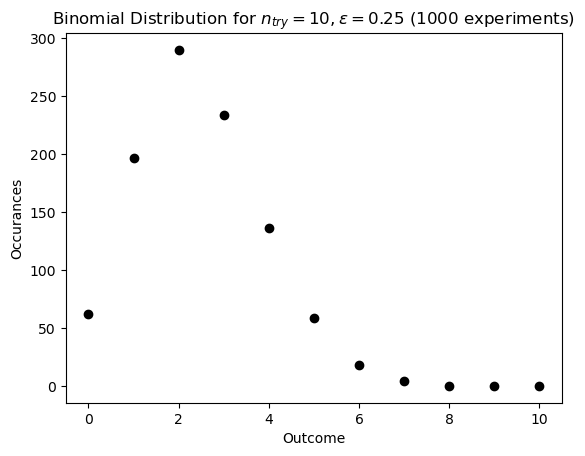

In [6]:
n_exp = 1000
n_try = 10
eps = 0.25
m = throw_binomial(n_exp, n_try, eps) #outcome array
counts, edges = np.histogram(m, bins=11, range=(0,11))
plt.plot(edges[:-1], counts, "ko")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
plt.title("Binomial Distribution for $n_{try} = 10, \epsilon = 0.25$ (1000 experiments)")
plt.show()
#results of monte carlo simulation

### 9.6

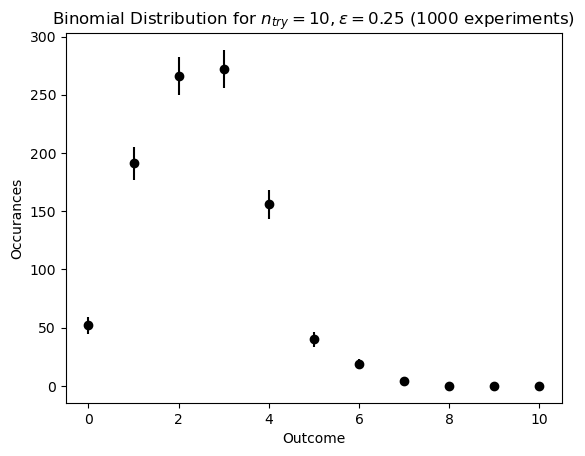

In [7]:
n_exp = 1000
n_try = 10
eps = 0.25
m = throw_binomial(n_exp, n_try, eps) #outcome array
counts, edges = np.histogram(m, bins=11, range=(0,11))
plt.errorbar(edges[:-1], counts, fmt="ko", yerr=counts**0.5)
plt.xlabel("Outcome")
plt.ylabel("Occurances")
plt.title("Binomial Distribution for $n_{try} = 10, \epsilon = 0.25$ (1000 experiments)")
plt.show()
#results of monte carlo simulation (with error bars)

### 9.7

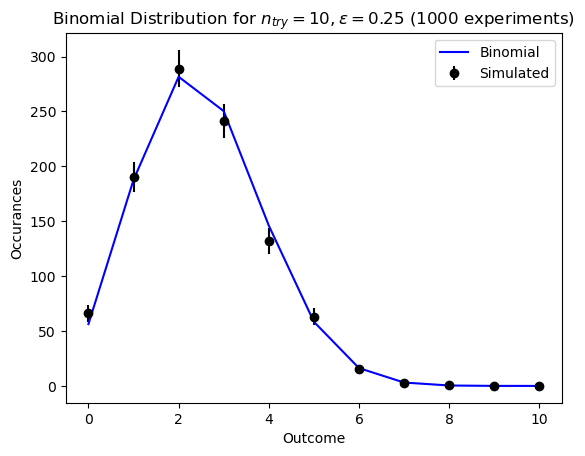

In [8]:
n_exp = 1000
n_try = 10
eps = 0.25
m = throw_binomial(n_exp, n_try, eps) #outcome array
counts, edges = np.histogram(m, bins=11, range=(0,11))
plt.errorbar(edges[:-1], counts, fmt="ko", yerr=counts**0.5, label="Simulated")
xpred = edges[:-1]
ypred = n_exp * binom.pmf(xpred, n_try, eps)
plt.plot(xpred, ypred, "b-", label="Binomial")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
plt.title("Binomial Distribution for $n_{try} = 10, \epsilon = 0.25$ (1000 experiments)")
plt.legend()
plt.show()
#results of monte carlo simulation (with error bars) and binomial distribution

### 9.8

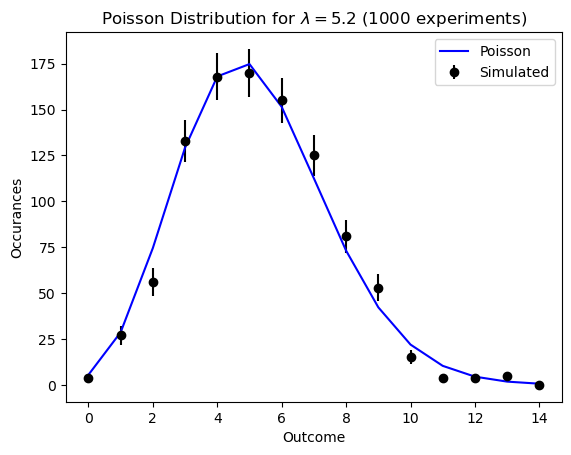

In [9]:
n_exp = 1000
n_try = 1000
lamb = 5.2
eps = lamb/n_try
m = throw_binomial(n_exp, n_try, eps) #outcome array
counts, edges = np.histogram(m, bins=15, range=(0,15))
plt.errorbar(edges[:-1], counts, fmt="ko", yerr=counts**0.5, label="Simulated")
xpred = edges[:-1]
ypred = n_exp * poisson.pmf(xpred, lamb)
plt.plot(xpred, ypred, "b-", label="Poisson")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
plt.title("Poisson Distribution for $\lambda = 5.2$ (1000 experiments)")
plt.legend()
plt.show()
#results of monte carlo simulation (with error bars) and poisson distribution

### 9.9

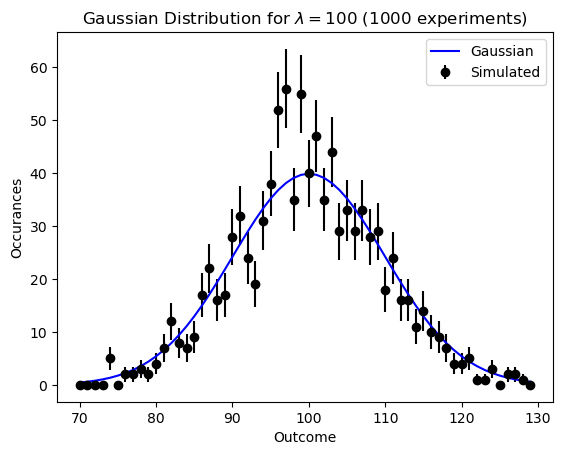

In [10]:
n_exp = 1000
n_try = 1000
lamb = 100
eps = lamb/n_try
m = throw_binomial(n_exp, n_try, eps) #outcome array
counts, edges = np.histogram(m, bins=60, range=(70,130))
plt.errorbar(edges[:-1], counts, fmt="ko", yerr=counts**0.5, label="Simulated")
xpred = edges[:-1]
ypred = n_exp * norm.pdf(xpred, loc=lamb, scale=lamb**0.5)
plt.plot(xpred, ypred, "b-", label="Gaussian")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
plt.title("Gaussian Distribution for $\lambda = 100$ (1000 experiments)")
plt.legend()
plt.show()
#results of monte carlo simulation (with error bars) and gaussian distribution

### 9.10

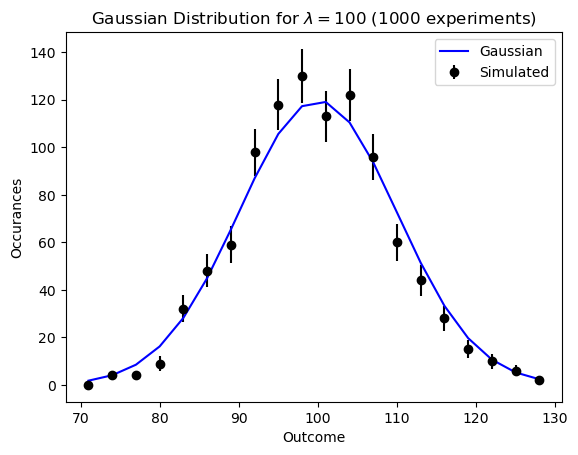

In [11]:
n_exp = 1000
n_try = 1000
lamb = 100
eps = lamb/n_try
m = throw_binomial(n_exp, n_try, eps) #outcome array
counts, edges = np.histogram(m, bins=20, range=(70,130))
plt.errorbar((edges[:-1] + edges[1:] - 1)/2, counts, fmt="ko", yerr=counts**0.5, label="Simulated")
xpred = (edges[:-1] + edges[1:] - 1)/2
ypred = 3 * n_exp * norm.pdf(xpred, loc=lamb, scale=lamb**0.5)
plt.plot(xpred, ypred, "b-", label="Gaussian")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
plt.title("Gaussian Distribution for $\lambda = 100$ (1000 experiments)")
plt.legend()
plt.show()
#results of monte carlo simulation (with error bars) and gaussian distribution